# Data Extraction (CSS + REGEX)

One of the core tasks fo any Data Analytics project is Data Mining. One of the useful tools that we teach at Ironhack is Web Scraping.

In this part you can find 3 different tasks, which will evaluate your skills in CSS3 selectors and regular expressions knowledge, which are essential to data extraction processes. We believe that even if you do not have previous knowledge of CSS, HTML and REGEX, you should be able to complete this task in less than a hour. There are many tutorials and informations on how to use CSS3 selectors and regular expressions to extract data. Do not be afraid to google it! This task is also a evaluation of your learning capabilities.

The normal questions already have some examples and can be solved only by filling the CSS3 selectors or the regular expressions in the given space. You can check if you have the correct results by running the pre-made script after it. However, if you feel comfortable, you can use another python package and rewrite the script in a similar way to extract the data.

For the extra challenges, you'll need to construct the scripts from scratch.

(1) For the following task, use the listing.html file, which represents a listings for a property. Open the HTML file on your browser, investigate it with the Inspect tool, view the source code and explore it. After that, fill the CSS3 selectors in the following script to extract the following information about this property:

   * Number of bathrooms
   * Number of bedrooms
   * Living Area
   * Energy Rating
   * Description
   * Agent Name
   * Extract the location of the property



In [1]:
!pip install lxml --user 
!pip install cssselect --user

In [2]:
import lxml
import cssselect

In [3]:
# EXAMPLE SELECTOR TO EXTRACT THE PROPERTY TYPE
Selector_Example = "h1.lbl_titulo"

In [4]:
# EXAMPLE CODE, RUN TO CHECK THE EXAMPLE SELECTOR 

from lxml import html, etree

with open(r'listing.html', "r") as f:
    page = f.read()
tree = html.fromstring(page)

print('Example -> Property type: {}'.format(tree.cssselect(Selector_Example)[0].text))

Example -> Property type: 3 Bedroom House


Now that you understand the example, just fill the CSS selectors here and check it by running the below cells:

In [5]:
############## Q1 ANSWERS ##################
Selector_1 = ".bloco-dados > li:nth-child(4) > span:nth-child(2)"
Selector_2 = ".bloco-dados > li:nth-child(5) > span:nth-child(2)"
Selector_3 = ".bloco-dados > li:nth-child(3) > span:nth-child(2)"
Selector_4 = ".bloco-dados > li:nth-child(2) > span:nth-child(2)"
Selector_5 = ".bloco-imovel-texto > p:nth-child(2)"
Selector_6 = "div.lbl_titulo"
Selector_7 = "#Cpl_lbl_morada"



In [6]:
############### RUN TO CHECK YOUR ANSWERS ##################
print('Bathrooms: {}'.format(tree.cssselect(Selector_1)[0].text))
print('')
print('Bedrooms: {}'.format(tree.cssselect(Selector_2)[0].text))
print('')
print('Total area: {}'.format(tree.cssselect(Selector_3)[0].text))
print('')
print('Living area: {}'.format(tree.cssselect(Selector_4)[0].text))
print('')
print('Description: {}'.format(tree.cssselect(Selector_5)[0].text))
print('')
print('Agent name: {}'.format(tree.cssselect(Selector_6)[0].text))
print('')
print('Location: {}'.format(tree.cssselect(Selector_7)[0].text))

Bathrooms:  1 

Bedrooms:  2 

Total area:  0 m

Living area:  80 m

Description: At vero eos et accusamus et iusto odio dignissimos ducimus qui blanditiis praesentium voluptatum deleniti atque corrupti quos dolores et quas molestias excepturi sint occaecati cupiditate non provident, similique sunt in culpa qui officia deserunt mollitia animi, id est laborum et dolorum fugaEt harum quidem rerum facilis est et expedita distinctio.Nam libero tempore, cum soluta nobis est eligendi optio cumque nihil impedit quo minus id quod maxime placeat facere possimus, omnis voluptas assumenda est, omnis dolor repellendus.

Agent name: Agent John Doe

Location: Portugal, Lisboa, Estrela, Lapa


**Extra Challenge:**

Write from scratch a script to extract and print:

   * One link that leads to http://mydomain.com/link-to-image
   * Extract all the features of the property



In [7]:
############### WRITE THE SCRIPT TO SOLVE THE EXTRA CHALLENGE HERE ##################
link_to_image = '.col-lg-4 > a:nth-child(1)'
#print('link_to_image: {}'.format(tree.cssselect(link_to_image).text))
m = tree.cssselect(link_to_image)

In [8]:
m[0].get('href')

'http://mydomain.com/link-to-image'

In [9]:
for i in range(1,5):
    f = tree.cssselect(f'.modulo-caracteristicas-conteudo > li:nth-child({i}) > span:nth-child(1)')
    print(f'The features of the house are: {f[0].text}')

The features of the house are: Garden
The features of the house are: Gas Heating
The features of the house are: 2 garages
The features of the house are: Large pool


In [10]:
l_features = [tree.cssselect(f'.modulo-caracteristicas-conteudo > li:nth-child({i}) > span:nth-child(1)') for i in range(1,5)]

In [11]:
for i in l_features:
    print(i[0].text)

Garden
Gas Heating
2 garages
Large pool


(2) In the second part you will still have to use the html file. However, this time, you should use regular expressions to extract the following data from the webpage:

   * Urls that are links to listings (i.e.: http://mydomain.com/link-to-listing). Do not use the whole url itself in regular expression. It should select only 3 links.
   * The agent telephone number
   * The property price



In [12]:
import pandas as pd

In [13]:
# REGEXP EXAMPLE TO EXTRACT THE AGENT EMAIL
Regexp_Example = r"\">(.*?@.*?)<"

In [14]:
# RUN TO CHECK THE EXAMPLE RESULTS
import re

with open(r'listing.html', "r", encoding = 'utf-8') as f:
    page = f.read()

print("Email extracted: {}".format(re.findall(Regexp_Example, page)))

Email extracted: ['casa@casa.pt']


In [15]:
# WRITE YOUR REGULAR EXPRESSIONS HERE
Regexp_1 = r"http://\w*.\w*/[-\w]*"
Regexp_2 = r"(\d{4}-\d{4})"
Regexp_3 = r"\">(.*€)<"

In [16]:
rex_3 = re.findall(r"\">(.*€)<", page)

In [17]:
rex_3

['1.500.000 €']

In [18]:
############### RUN TO CHECK YOUR ANSWERS ##################
print('Links extrated:')
for w in re.findall(Regexp_1, page):
    print(w)
print('')
print("Agent Phone Number: {}".format(re.findall(Regexp_2, page)[0]))
print('')
print("Property price: {}".format(re.findall(Regexp_3, page)))

Links extrated:
http://mydomain.com/link-to-image
http://mydomain.com/link-to-listing
http://mydomain.com/link-to-listing
http://mydomain.com/link-to-listing

Agent Phone Number: 0800-1111

Property price: ['1.500.000 €']


**Extra Challenge**

   * Extract latitude and longitude value from html ()those values are in the html code, but are not shown on the page_)



In [19]:
############### WRITE THE SCRIPT TO SOLVE THE EXTRA CHALLENGE HERE ##################
regex_long_latitude = r'\d+\.\d+\,\-\d+\.\d+'
long_latitude = re.findall(regex_long_latitude, page)
print(f'The coordinates for the house: {long_latitude[0]}')

The coordinates for the house: 36.5194999,-4.7743365


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Data Analysis

**Task:**

   1.Describe clients of the bank.
   
   2.Compose a model to predict the revenue from marketing campaigns per client.

**Data:**

For the analysis, several tables are available:

   * Social-demographical data (age, gender, tenure in a bank)
   * Products owned + actual volumes (current account, saving account, mutual funds, overdraft, credit card, consumer loan)
   * Inflow/outflow on C/A, aggregated card turnover (monthly average over the past 3 months)
   * For 60 % of clients actual sales + revenues from these are available

**Proposed steps:**

   * Check for errors and outliers in data. Apply some steps to fix errors.
   * Study the difference between clients of bank.
   * Analyze 3 groups separately (consumer loan, credit card, mutual fund)

**Expected result:**

   * Descriptive analysis with plots and tables. (25%)
   * Exploratory analysis with discussion of patterns found. (35%)
   * Revenue prediction model. (30%)
   * Polite coding and description of steps. (10%)


## Task
**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
#Load Data and getting info

libro = pd.ExcelFile('data.xlsx')
libro.sheet_names

['Description',
 'Soc_Dem',
 'Products_ActBalance',
 'Inflow_Outflow',
 'Sales_Revenues']

In [3]:
clients_desc = libro.parse('Description')
clients_desc

,Sheet,Variable,Description
0,Soc_Dem,Client,client ID
1,NaN,Sex,gender
2,NaN,Age,age [years]
3,NaN,Tenure,tenure with the bank [months]
4,Products_ActBalance,Client,client ID
5,NaN,Count_CA,number of live current accounts
6,NaN,Count_SA,number of live saving accounts
7,NaN,Count_MF,number of live mutual funds
8,NaN,Count_OVD,number of live overdrafts
9,NaN,Count_CC,number of live credit cards


In [53]:
clients_desc.loc[25]['Description']

'monthly volume of debit cashless transactions via card [EUR]'

# *
The first sheet tell us about the others; the name of the variables and what does it means each one.
We began with the sheet that got the general information about the clients of the Bank and take a look and seek for missing values, values that doesn´t make sense, type of value that are correct, in a overall; clean the data.

In [4]:
#Asign the sheet Soc_Dem
clients_df = libro.parse('Soc_Dem')
clients_df.head(10)

,Client,Sex,Age,Tenure
0,909,M,21,27
1,1217,M,38,165
2,850,F,49,44
3,1473,M,54,34
4,1038,M,29,106
5,225,M,14,187
6,699,M,37,175
7,827,M,57,50
8,1231,F,6,232
9,528,F,19,70


Looking for missing Values

In [5]:
clients_df.isna().sum()

Client    0
Sex       3
Age       0
Tenure    0
dtype: int64

In this case 3 records have no Age but we can assume that are records that had been capture wrong because they have Age and a tenure with the bank we fill them with either with 'M' or 'F' 

In [6]:
clients_df['Sex'].loc[list(clients_df[clients_df.Sex.isna()].index)] = random.choice(['M','F'])

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
clients_df

,Client,Sex,Age,Tenure
0,909,M,21,27
1,1217,M,38,165
2,850,F,49,44
3,1473,M,54,34
4,1038,M,29,106
...,...,...,...,...
1610,409,M,31,91
1611,384,M,23,160
1612,977,M,46,59
1613,629,F,61,173


We got Values that doesn´t make sense. Like A female with 6 years old and got a Tenure of 232 months with the bank, we can expect that are values like this, we can drop them out or correct them.
The same with the missing Values.


In [9]:
clients_df[clients_df['Age'] < 18]

,Client,Sex,Age,Tenure
5,225,M,14,187
8,1231,F,6,232
18,316,F,1,211
19,461,F,17,64
31,729,M,17,85
...,...,...,...,...
1470,1044,F,2,70
1502,80,M,9,81
1505,300,F,5,87
1554,648,F,7,152


In [10]:
%pprint off
under_age = list(clients_df.loc[clients_df['Age'] < 18].index)
print(under_age,'\n'*3,f'Clients with Age less than 18: {len(under_age)}')

Pretty printing has been turned OFF
[5, 8, 18, 19, 31, 36, 37, 71, 72, 94, 98, 127, 160, 166, 178, 196, 219, 226, 235, 242, 259, 280, 291, 295, 304, 345, 357, 358, 375, 381, 390, 391, 392, 451, 464, 479, 484, 491, 498, 502, 505, 580, 598, 612, 615, 676, 689, 716, 724, 730, 741, 766, 770, 773, 807, 870, 921, 953, 961, 969, 990, 999, 1011, 1013, 1017, 1047, 1048, 1053, 1059, 1083, 1086, 1175, 1182, 1188, 1209, 1212, 1218, 1233, 1236, 1238, 1294, 1298, 1303, 1304, 1320, 1321, 1366, 1384, 1385, 1392, 1396, 1420, 1445, 1458, 1462, 1470, 1502, 1505, 1554, 1562] 


 Clients with Age less than 18: 100


We got 100 clients that are under 18 years old so we can give them a minimum age to make sense

In [11]:
clients_df.loc[clients_df['Age'] < 18, ['Age']] = 18

We can group the clients by their Sex and see the proportions

In [12]:
sex_client = clients_df.groupby('Sex').count()

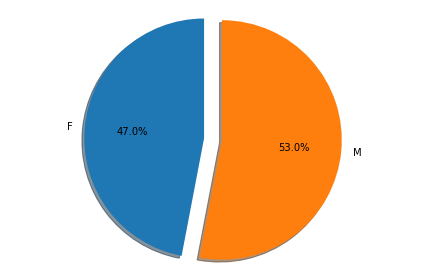

In [13]:
plt.pie(sex_client['Client'],labels=sex_client.index,shadow=True,explode=(0, 0.15),startangle=90,autopct='%1.1f%%')
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

As we can see the gender that got the most interaction with the bank are male.

Also we can group the data by Sex and ranges of Ages 

In [14]:
bins = pd.IntervalIndex.from_tuples([(17,30),(30,45),(45,60),(60,99)])
ages_df = clients_df.groupby(['Sex',pd.cut(clients_df.Age,bins)]).count()
ages_count = ages_df['Client']
ages_count

Sex  Age     
F    (17, 30]    228
     (30, 45]    222
     (45, 60]    150
     (60, 99]    159
M    (17, 30]    231
     (30, 45]    264
     (45, 60]    180
     (60, 99]    181
Name: Client, dtype: int64

And plot the groups

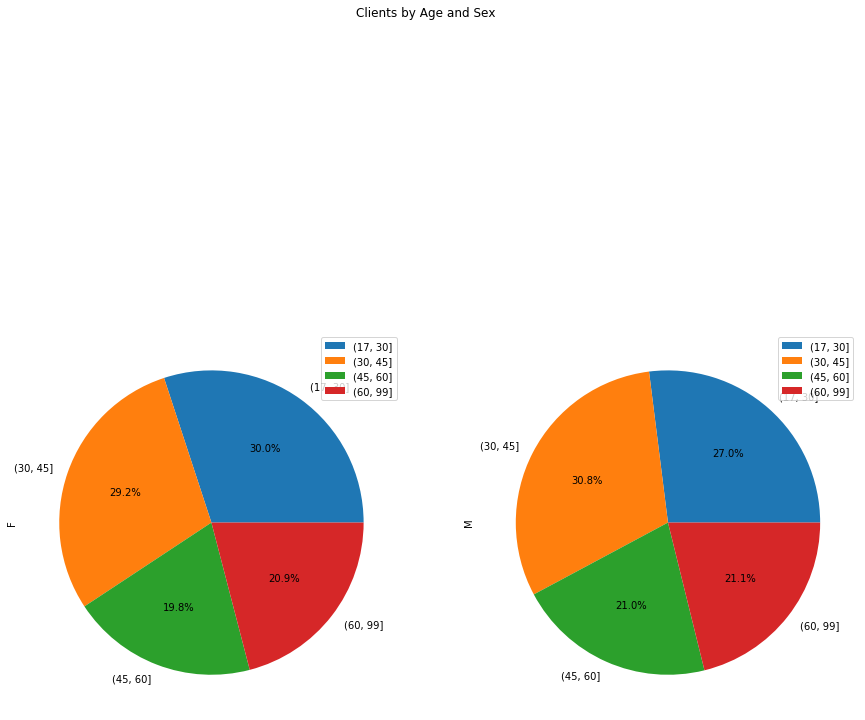

In [15]:
ages_count.unstack(level=0).plot(kind='pie', subplots=True ,rot =0, autopct = '%1.1f%%', figsize=(15,15), title = 'Clients by Age and Sex')
plt.show()

The customers in the bank got almost the same proportion between them by gender and range of ages with a slighty difference.

For the third sheet we got information about the products of the bank.

In [16]:
clients_prod = libro.parse('Products_ActBalance')
clients_prod.isnull().sum()

Client           0
Count_CA         0
Count_SA      1189
Count_MF      1309
Count_OVD     1196
Count_CC      1445
Count_CL      1480
ActBal_CA        0
ActBal_SA     1189
ActBal_MF     1309
ActBal_OVD    1196
ActBal_CC     1445
ActBal_CL     1480
dtype: int64

We got null values in the second sheet, refering those customers that dont have a certain type of account so we fill them with zero

In [17]:
clients_prod.fillna(0, inplace = True)

In [18]:
clients_prod.head()

,Client,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,1,1,0.0,0.0,1.0,0.0,0.0,1333.802857,0.000000,0.000000,0.0,0.000000,0.0
1,2,1,1.0,0.0,0.0,0.0,0.0,110.768571,13326.190357,0.000000,0.0,0.000000,0.0
2,3,1,0.0,1.0,0.0,0.0,0.0,482.654643,0.000000,107.251786,0.0,0.000000,0.0
3,4,1,1.0,0.0,0.0,1.0,0.0,1599.840714,76.437143,0.000000,0.0,1110.381786,0.0
4,5,1,1.0,0.0,0.0,0.0,0.0,5353.483929,8079.715714,0.000000,0.0,0.000000,0.0


We can link them the general information of the clients merging two sheets from the xlsx file

In [40]:
clients_merged = clients_df.merge(clients_prod, on = 'Client', how = 'left')
clients_merged

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,909,M,21,27,1,0.0,0.0,1.0,0.0,1.0,4.710714,0.000000,0.000000,0.0,0.00,4291.996429
1,1217,M,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,0.000000,0.000000,0.0,0.00,0.000000
2,850,F,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,0.000000,0.000000,0.0,0.00,0.000000
3,1473,M,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,14447.801429,0.000000,0.0,653.91,1132.590357
4,1038,M,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,0.000000,0.000000,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,409,M,31,91,1,0.0,0.0,1.0,0.0,0.0,348.402857,0.000000,0.000000,0.0,0.00,0.000000
1611,384,M,23,160,1,0.0,0.0,0.0,0.0,0.0,2418.876786,0.000000,0.000000,0.0,0.00,0.000000
1612,977,M,46,59,1,0.0,0.0,0.0,0.0,0.0,2639.308571,0.000000,0.000000,0.0,0.00,0.000000
1613,629,F,61,173,1,0.0,2.0,0.0,0.0,0.0,61.766786,0.000000,34387.583571,0.0,0.00,0.000000


From this new dataframe we can get the count and type of accounts that the customers got and group them by Age and Sex.

In [41]:
clients_merged_sex = clients_merged.iloc[:,1:10]

In [42]:
clients_merged_sex.drop(['Tenure','Age'],inplace = True,axis = 1)
clients_merged_sex

,Sex,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL
0,M,1,0.0,0.0,1.0,0.0,1.0
1,M,1,0.0,0.0,0.0,0.0,0.0
2,F,1,0.0,0.0,0.0,0.0,0.0
3,M,1,1.0,0.0,0.0,1.0,1.0
4,M,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1610,M,1,0.0,0.0,1.0,0.0,0.0
1611,M,1,0.0,0.0,0.0,0.0,0.0
1612,M,1,0.0,0.0,0.0,0.0,0.0
1613,F,1,0.0,2.0,0.0,0.0,0.0


With a new 

In [62]:
bins = pd.IntervalIndex.from_tuples([(17,30),(30,45),(45,60),(60,99)])
clients_count_sex=clients_merged_sex.groupby(['Sex',pd.cut(clients_merged.Age,bins)]).sum()
clients_count_sex

Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL
Sex Age                                                                  
F   (17, 30]       237      62.0     262.0       53.0      19.0      14.0
    (30, 45]       241      87.0     174.0       51.0      18.0      20.0
    (45, 60]       161      57.0      89.0       44.0      16.0      14.0
    (60, 99]       170      54.0     105.0       42.0      26.0      17.0
M   (17, 30]       247      51.0     216.0       66.0      29.0      27.0
    (30, 45]       283      73.0     192.0       59.0      22.0      32.0
    (45, 60]       196      54.0     247.0       48.0      19.0      17.0
    (60, 99]       207      59.0     146.0       56.0      21.0      19.0

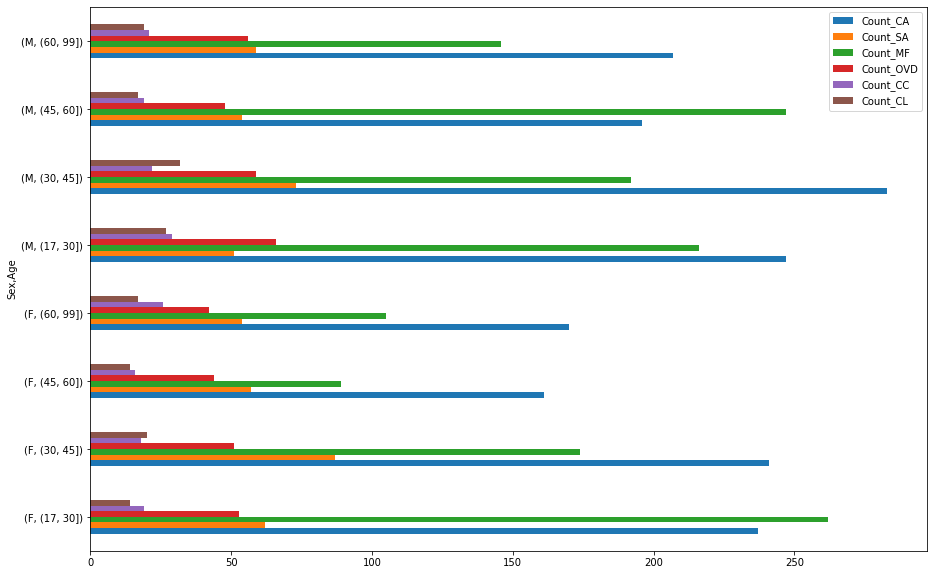

In [90]:
clients_count_sex.plot(kind = 'barh', figsize = (15,10))
plt.show()

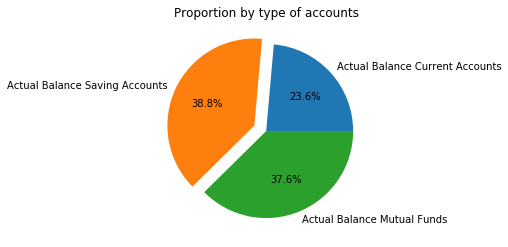

In [91]:
labels = ['Actual Balance Current Accounts','Actual Balance Saving Accounts','Actual Balance Mutual Funds']
plt.title('Proportion by type of accounts')
plt.pie(clients_merged[['ActBal_CA','ActBal_SA','ActBal_MF']].sum(), labels = labels,autopct='%1.1f%%',explode = [0,0.15,0])
plt.show()

In [72]:
act_bal_sex = clients_merged[['ActBal_CA','ActBal_SA','ActBal_MF']].groupby(clients_merged.Sex).sum()

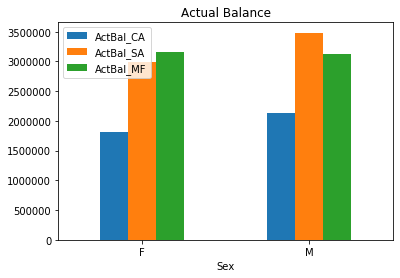

In [73]:
act_bal_sex.plot(kind = 'bar', title = 'Actual Balance', rot = 0)
plt.show()

In [74]:
clients_in_out = libro.parse('Inflow_Outflow')
clients_in_out.head(5)

,Client,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1017,0.005000,0.005000,1,1,118.046429,118.046429,25.000000,91.796429,0.000000,12,12,2,9,0
1,1456,364.772143,364.752857,4,3,774.980000,774.980000,14.285714,497.444286,258.607143,28,28,1,20,5
2,545,2471.719286,2471.719286,14,14,2190.257143,2190.257143,303.571429,179.082143,1229.428571,23,23,3,5,12
3,667,1127.792857,1127.792857,4,4,1344.603571,1344.603571,642.857143,194.285714,249.321429,21,21,3,4,8
4,1381,571.618214,571.618214,3,3,57.071429,57.071429,10.714286,46.357143,0.000000,6,6,1,5,0


In [80]:
clients_in_out_merged = clients_df.merge(clients_in_out, on = 'Client', how = 'left')
clients_in_out_merged

,Client,Sex,Age,Tenure,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,909,M,21,27,789.129643,738.230000,4.0,3.0,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0
1,1217,M,38,165,0.002143,0.002143,1.0,1.0,714.285714,714.285714,0.000000,0.000000,714.285714,1.0,1.0,0.0,0.0,1.0
2,850,F,49,44,1392.402857,1392.402857,3.0,3.0,1226.345357,1226.345357,0.000000,0.000000,121.928571,6.0,6.0,0.0,0.0,1.0
3,1473,M,54,34,1787.127500,939.128929,14.0,5.0,3875.137857,3794.580714,357.142857,444.597500,2076.785714,48.0,38.0,1.0,26.0,11.0
4,1038,M,29,106,0.006071,0.006071,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,409,M,31,91,469.179643,469.179643,3.0,3.0,465.092857,465.092857,178.571429,11.414286,271.714286,12.0,12.0,1.0,1.0,9.0
1611,384,M,23,160,87.500357,87.500357,2.0,2.0,88.443929,88.443929,50.000000,37.372500,1.071429,8.0,8.0,2.0,5.0,1.0
1612,977,M,46,59,71.428571,71.428571,1.0,1.0,76.103571,76.103571,75.000000,1.067857,0.035714,4.0,4.0,2.0,1.0,1.0
1613,629,F,61,173,1064.190000,1064.190000,3.0,3.0,817.462143,817.462143,660.714286,41.355000,115.178571,17.0,17.0,3.0,5.0,8.0


In [89]:
trans_ratios = clients_in_out_merged[['Client','Sex','Age']]

In [84]:
trans_ratios['Cred_Ratio'] = clients_in_out_merged['VolumeCred']/clients_in_out_merged['TransactionsCred']
trans_ratios['Cred_CA_Ratio'] = clients_in_out_merged['VolumeCred_CA']/clients_in_out_merged['TransactionsCred_CA']
trans_ratios['Deb_Ratio'] = clients_in_out_merged['VolumeDeb']/clients_in_out_merged['TransactionsDeb']
trans_ratios['Deb_CA_Ratio'] = clients_in_out_merged['VolumeDeb_CA']/clients_in_out_merged['TransactionsDeb_CA']
trans_ratios['Deb_Cash_Card_Ratio'] = clients_in_out_merged['VolumeDebCash_Card']/clients_in_out_merged['TransactionsDebCash_Card']
trans_ratios['Deb_Cashless_Card_Ratio'] = clients_in_out_merged['VolumeDebCashless_Card']/clients_in_out_merged['TransactionsDebCashless_Card']
trans_ratios['Deb_PaymentOrder_Ratio'] = clients_in_out_merged['VolumeDeb_PaymentOrder']/clients_in_out_merged['TransactionsDeb_PaymentOrder']
trans_ratios

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,Client,Sex,Age,Cred_Ratio,Cred_CA_Ratio,Deb_Ratio,Deb_CA_Ratio,Deb_Cash_Card_Ratio,Deb_Cashless_Card_Ratio,Deb_PaymentOrder_Ratio
0,909,M,21,197.282411,246.076667,56.334821,64.127551,178.571429,NaN,41.642857
1,1217,M,38,0.002143,0.002143,714.285714,714.285714,NaN,NaN,714.285714
2,850,F,49,464.134286,464.134286,204.390893,204.390893,NaN,NaN,121.928571
3,1473,M,54,127.651964,187.825786,80.732039,99.857387,357.142857,17.099904,188.798701
4,1038,M,29,0.006071,0.006071,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1610,409,M,31,156.393214,156.393214,38.757738,38.757738,178.571429,11.414286,30.190476
1611,384,M,23,43.750179,43.750179,11.055491,11.055491,25.000000,7.474500,1.071429
1612,977,M,46,71.428571,71.428571,19.025893,19.025893,37.500000,1.067857,0.035714
1613,629,F,61,354.730000,354.730000,48.086008,48.086008,220.238095,8.271000,14.397321


In [87]:
trans_ratios.fillna(0, inplace = True)
trans_ratios_sex = trans_ratios.drop(['Client','Age'], axis = 1)
trans_ratios_sex_plt = trans_ratios_sex.groupby('Sex').sum()

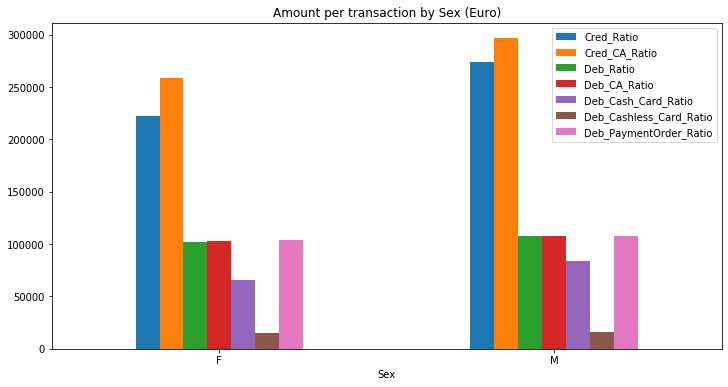

In [88]:
trans_ratios_sex_plt.plot(kind = 'bar', figsize = (12,6), rot =0, title = 'Amount per transaction by Sex (Euro)') 
plt.show()